data : Orthogonal Frequency Division Multiplexing (OFDM)
len of data: 49
tx bits:  [0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1

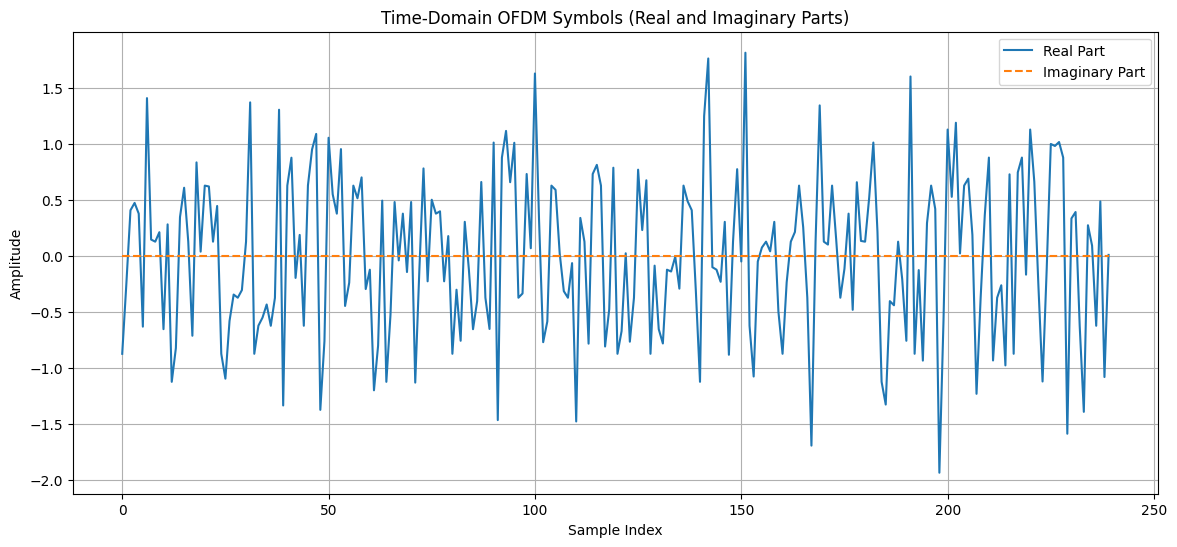

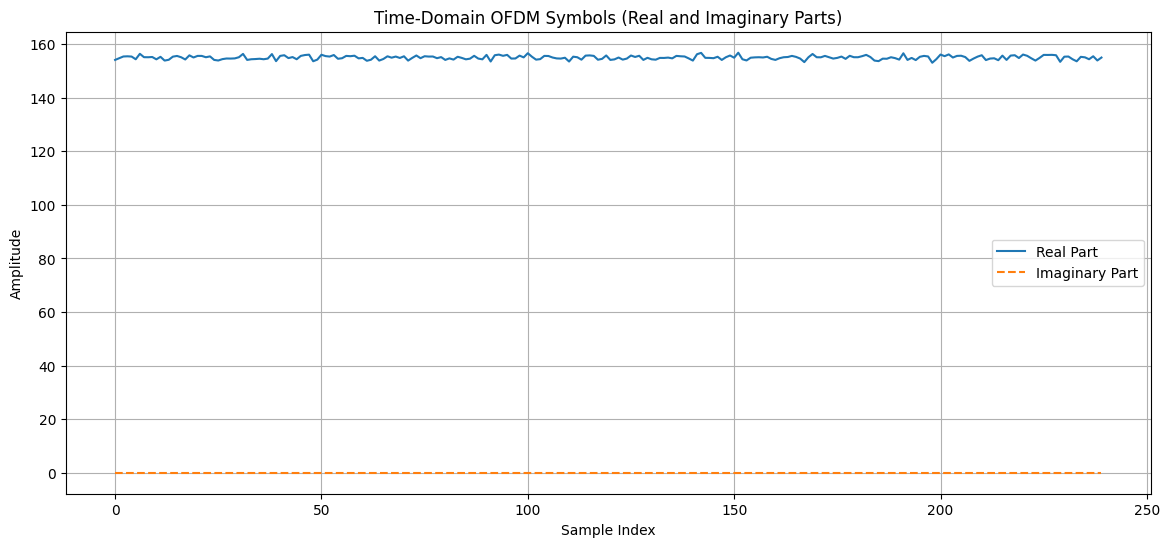

data = np.array([154.125, 154.74758350746546, 155.40533008588991, 155.47067085809127, 155.375, 154.367117467498, 156.40533008588991, 155.1440301168722, 155.125, 155.2095232737211, 154.34466991411009, 155.27932914190873, 153.875, 154.17577575131546, 155.34466991411009, 155.6059698831278, 155.125, 154.28601163029262, 155.83210678118655, 155.03601163029262, 155.625, 155.61726985214554, 155.125, 155.44339031963426, 154.125, 153.90332819792755, 154.41789321881345, 154.65332819792755, 154.625, 154.69339031963426, 155.125, 156.36726985214554, 154.125, 154.37604765947054, 154.44822330470336, 154.56477378298163, 154.375, 154.62343206679907, 156.30177669529664, 153.6641078932149, 155.625, 155.87395234052946, 154.80177669529664, 155.18522621701837, 154.375, 155.62656793320093, 155.94822330470336, 156.0858921067851, 153.625, 154.23813304176252, 156.05177669529664, 155.54731159931038, 155.375, 155.95059308174856, 154.55177669529664, 154.75873109183564, 155.625, 155.51186695823748, 155.6982233047033

In [8]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import reedsolo

def string_to_bits(s):
    return list(itertools.chain.from_iterable([list(map(int, f"{ord(c):08b}")) for c in s]))

def binary_to_bytes(binary_str):
    byte_array = bytearray()
    for i in range(0, len(binary_str), 8):
        byte_array.append(int(binary_str[i:i+8], 2))
    return bytes(byte_array)

def bytes_to_binary(byte_array):
    return ''.join(f'{byte:08b}' for byte in byte_array)

def binary_to_qam16(bits):
    M = 16
    bits_per_symbol = int(np.log2(M))
    pad_length = (bits_per_symbol - len(bits) % bits_per_symbol) % bits_per_symbol
    padded_bits = np.append(bits, [0] * pad_length)

    mapping = {
        '0000': -3-3j, '0001': -3-1j, '0010': -3+3j, '0011': -3+1j,
        '0100': -1-3j, '0101': -1-1j, '0110': -1+3j, '0111': -1+1j,
        '1000':  3-3j, '1001':  3-1j, '1010':  3+3j, '1011':  3+1j,
        '1100':  1-3j, '1101':  1-1j, '1110':  1+3j, '1111':  1+1j
    }

    symbols = []
    for i in range(0, len(padded_bits), bits_per_symbol):
        bit_group = ''.join(str(int(bit)) for bit in padded_bits[i:i+bits_per_symbol])
        symbols.append(mapping[bit_group])

    return np.array(symbols)

def hermitian_symmetry(symbols):
    N = 16
    hermitian_symmetric = np.zeros(N, dtype=complex)
    hermitian_symmetric[1:8] = symbols[0:7]
    hermitian_symmetric[8] = 0
    hermitian_symmetric[9] = np.conj(symbols[6])
    hermitian_symmetric[10:15] = np.conj(symbols[1:6])[::-1]
    hermitian_symmetric[15] = np.conj(symbols[0])
    return hermitian_symmetric

def create_ofdm_symbols(qam_symbols, num_subcarriers=16, symbols_per_ofdm=7):
    num_ofdm_symbols = len(qam_symbols) // symbols_per_ofdm
    ofdm_symbols = []

    for i in range(num_ofdm_symbols):
        start_idx = i * symbols_per_ofdm
        end_idx = start_idx + symbols_per_ofdm
        qam_chunk = qam_symbols[start_idx:end_idx]
        hermitian_symmetric_seq = hermitian_symmetry(qam_chunk)
        print("hermitian_symmetric_seq Symbols:")
        print(hermitian_symmetric_seq)
        time_domain_ofdm = np.fft.ifft(hermitian_symmetric_seq)
        ofdm_symbols.append(time_domain_ofdm)

    return np.array(ofdm_symbols)

data = "Orthogonal Frequency Division Multiplexing (OFDM)"
# data = "Implementation Division Multiplexing Programming Code"
print (f"data : {data}")
character_count = len(data)
print (f"len of data: {character_count}")


bits = string_to_bits(data)
print("tx bits: ", bits)

binary_str = ''.join(map(str, bits))
print(f"Transmitted Signal: {list(binary_str)}")

data_bytes = binary_to_bytes(binary_str)

n = 15
k = 11
rs = reedsolo.RSCodec(n - k)
encoded_data = rs.encode(data_bytes)

encoded_binary = bytes_to_binary(encoded_data)
print(f"FEC Encoded binary data: {encoded_binary}")

binary_list = [int(bit) for bit in encoded_binary]
print(binary_list)

qam_symbols = binary_to_qam16(binary_list)
print(f"QAM Symbols (one row per subcarrier):{qam_symbols}")

ofdm_symbols = create_ofdm_symbols(qam_symbols)
print("Time-Domain OFDM Symbols:")
print(ofdm_symbols)

dc_ofdm_symbols = ofdm_symbols + 155
print("Time-Domain biased OFDM Symbols:")
print(dc_ofdm_symbols)

tx_signal_combined_real = np.concatenate([ofdm.real for ofdm in dc_ofdm_symbols])
print("combine real of ofdm", tx_signal_combined_real)

def plot_ofdm_symbols(ofdm_symbols):
    combined_real = np.concatenate([ofdm.real for ofdm in ofdm_symbols])
    combined_imag = np.concatenate([ofdm.imag for ofdm in ofdm_symbols])

    plt.figure(figsize=(14, 6))
    plt.plot(combined_real, label='Real Part')
    plt.plot(combined_imag, label='Imaginary Part', linestyle='--')
    plt.title('Time-Domain OFDM Symbols (Real and Imaginary Parts)')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_ofdm_symbols(ofdm_symbols)
plot_ofdm_symbols(dc_ofdm_symbols)

values = [str(value) for value in tx_signal_combined_real]
formatted_values = ', '.join(values) + ','

# Output the formatted result
print(f"data = np.array([{formatted_values}])")



new_min = 220
new_max = 250
normalized_data = np.array([234, 239, 243, 244, 243, 236, 248, 242, 242, 242, 236, 242, 231, 234, 243, 244, 242, 235, 246, 241, 244, 244, 242, 243, 234, 232, 236, 238, 238, 239, 242, 248, 234, 236, 237, 238, 236, 238, 248, 229, 244, 246, 239, 242, 236, 244, 246, 247, 229, 235, 247, 244, 243, 246, 238, 239, 244, 244, 245, 239, 240, 231, 235, 244, 231, 237, 244, 240, 243, 240, 244, 231, 240, 245, 239, 244, 243, 243, 239, 242, 234, 239, 235, 243, 240, 236, 238, 245, 238, 236, 246, 227, 246, 247, 245, 246, 238, 238, 245, 241, 249, 243, 235, 236, 244, 244, 241, 239, 238, 240, 227, 243, 242, 235, 245, 245, 244, 235, 237, 245, 234, 236, 241, 235, 238, 245, 242, 245, 234, 240, 236, 235, 240, 240, 241, 239, 244, 244, 243, 239, 231, 248, 250, 240, 240, 239, 243, 234, 242, 245, 240, 250, 236, 232, 240, 241, 242, 241, 243, 237, 234, 239, 242, 242, 244, 242, 238, 224, 242, 248, 242, 241, 244, 242, 238, 240, 243, 237, 245, 242, 242, 244, 246, 242, 231, 229, 238, 238, 242,

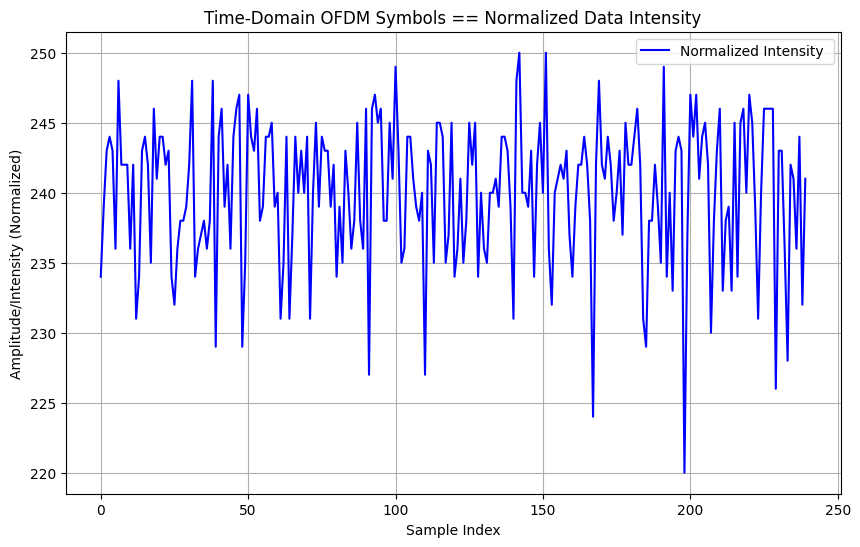

In [9]:
import numpy as np

# Data sampel
# data = np.array([154.125, 154.74758350746546, 155.40533008588991, 155.47067085809127, 155.375, 154.367117467498, 156.40533008588991, 155.1440301168722, 155.125, 155.2095232737211, 154.34466991411009, 155.27932914190873, 153.875, 154.17577575131546, 155.34466991411009, 155.6059698831278, 155.125, 154.28601163029262, 155.83210678118655, 155.03601163029262, 155.625, 155.61726985214554, 155.125, 155.44339031963426, 154.125, 153.90332819792755, 154.41789321881345, 154.65332819792755, 154.625, 154.69339031963426, 155.125, 156.36726985214554, 154.125, 154.37604765947054, 154.44822330470336, 154.56477378298163, 154.375, 154.62343206679907, 156.30177669529664, 153.6641078932149, 155.625, 155.87395234052946, 154.80177669529664, 155.18522621701837, 154.375, 155.62656793320093, 155.94822330470336, 156.0858921067851, 153.625, 154.23813304176252, 156.05177669529664, 155.54731159931038, 155.375, 155.95059308174856, 154.55177669529664, 154.75873109183564, 155.625, 155.51186695823748, 155.69822330470336, 154.70268840068962, 154.875, 153.79940691825144, 154.19822330470336, 155.49126890816436, 153.875, 154.4717185175618, 155.47855339059328, 154.9579553405202, 155.375, 154.8544019499269, 155.47855339059328, 153.86816512696853, 154.875, 155.7782814824382, 154.77144660940672, 155.49915144066637, 155.375, 155.3955980500731, 154.77144660940672, 155.1747280918449, 154.125, 154.69637380138855, 154.2411165235168, 155.30214458437948, 154.875, 154.34430202502728, 154.59466991411009, 155.65717958920473, 154.625, 154.3465194174249, 156.0088834764832, 153.53364185324745, 155.875, 156.11280475615928, 155.65533008588991, 156.00703397316838, 154.625, 154.66306023374435, 155.72855339059328, 155.06634171618254, 156.625, 155.31634171618254, 154.22855339059328, 154.41306023374435, 155.625, 155.58693976625565, 155.02144660940672, 154.68365828381746, 154.625, 154.93365828381746, 153.52144660940672, 155.33693976625565, 155.125, 154.21540391826073, 155.72855339059328, 155.81002711688146, 155.625, 154.18997288311854, 154.52144660940672, 155.78459608173927, 154.125, 154.3274893005527, 155.02144660940672, 154.232866101932, 154.625, 155.767133898068, 155.22855339059328, 155.6725106994473, 154.125, 154.91121073042956, 154.34466991411009, 154.21725342157555, 154.875, 154.85886704591317, 154.9911165235168, 154.70610583720537, 155.625, 155.4852358789772, 155.40533008588991, 154.67919318783117, 153.875, 156.2446863446801, 156.7588834764832, 154.8974475533879, 154.875, 154.76698151342046, 155.30177669529664, 154.11631562365372, 155.125, 155.77159899405427, 154.94822330470336, 156.810179501529, 154.375, 153.9223583147997, 154.94822330470336, 155.07302420456645, 155.125, 155.03906117772553, 155.30177669529664, 154.5004806702508, 154.125, 154.7631961878219, 155.125, 155.2113727770359, 155.625, 155.25426599584935, 154.625, 153.30608940663535, 155.125, 156.34035720277137, 155.125, 155.09928739474393, 155.625, 155.14218061355737, 154.625, 154.88325042158482, 155.375, 154.51698151342046, 155.65533008588991, 155.13168248838392, 155.125, 155.52159899405427, 156.0088834764832, 155.21242043650645, 153.875, 153.6723583147997, 154.59466991411009, 154.55765733983628, 155.125, 154.78906117772553, 154.2411165235168, 156.59823973527338, 154.125, 154.87158256348428, 154.06433982822017, 155.29062911092646, 155.625, 155.4164776702601, 153.06433982822017, 154.4213106553292, 156.125, 155.52486404592247, 156.18566017177983, 155.02003106085337, 155.625, 155.68707572033318, 155.18566017177983, 153.768029172891, 154.625, 155.3604349791141, 155.875, 154.06553987233826, 154.625, 154.7362835384477, 154.02144660940672, 155.72565622780792, 154.125, 155.74311841147917, 155.875, 154.83090673706846, 156.125, 155.66016307095902, 154.72855339059328, 153.87789716278536, 154.875, 155.99625427788104, 155.97855339059328, 156.0137164615523, 155.875, 153.41225838990007, 155.33210678118655, 155.3895650208859, 154.375, 153.60729911271224, 155.27144660940672, 155.08983692904098, 154.375, 155.48418821950665, 153.91789321881345, 155.00688158852083,])
data = np.array(tx_signal_combined_real)

# Rentang normalisasi yang diinginkan
new_min = 220
new_max = 250

print(f"new_min = {new_min}")
print(f"new_max = {new_max}")


# Fungsi untuk normalisasi menggunakan skala logaritmik
def normalize_logarithmic(data, new_min, new_max):
    data_min = np.min(data)
    data_max = np.max(data)
    log_data = np.log(data - data_min + 1)  # Menambahkan +1 untuk menghindari log(0)
    normalized_data = (log_data - np.min(log_data)) / (np.max(log_data) - np.min(log_data))
    scaled_data = np.round(normalized_data * (new_max - new_min) + new_min)  # Normalisasi dan skala ke rentang
    return scaled_data, data_min, data_max

# Normalisasi data ke rentang 10 - 250
normalized_data, data_min, data_max = normalize_logarithmic(data, new_min, new_max)

# Konversi ke bilangan bulat agar hasil tidak memiliki titik desimal
normalized_data = normalized_data.astype(int)

#print(f"Data Normalization: {normalized_data}")
# Output hasil yang sudah dinormalisasi
values = ', '.join(map(str, normalized_data)) + ','


print(f"normalized_data = np.array([{values}])")
print(f"data_min = {data_min}")
print(f"data_max = {data_max}")

# Plot the normalized data
plt.figure(figsize=(10, 6))
plt.plot(normalized_data, label='Normalized Intensity ', color='blue')
plt.title('Time-Domain OFDM Symbols == Normalized Data Intensity')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude/Intensity (Normalized)')
plt.grid(True)
plt.legend()
plt.show()



Values: [116, 156, 188, 196, 188, 132, 228, 180, 180, 180, 132, 180, 92, 116, 188, 196, 180, 124, 212, 172, 196, 196, 180, 188, 116, 100, 132, 148, 148, 156, 180, 228, 116, 132, 140, 148, 132, 148, 228, 76, 196, 212, 156, 180, 132, 196, 212, 220, 76, 124, 220, 196, 188, 212, 148, 156, 196, 196, 204, 156, 164, 92, 124, 196, 92, 140, 196, 164, 188, 164, 196, 92, 164, 204, 156, 196, 188, 188, 156, 180, 116, 156, 124, 188, 164, 132, 148, 204, 148, 132, 212, 60, 212, 220, 204, 212, 148, 148, 204, 172, 236, 188, 124, 132, 196, 196, 172, 156, 148, 164, 60, 188, 180, 124, 204, 204, 196, 124, 140, 204, 116, 132, 172, 124, 148, 204, 180, 204, 116, 164, 132, 124, 164, 164, 172, 156, 196, 196, 188, 156, 92, 228, 244, 164, 164, 156, 188, 116, 180, 204, 164, 244, 132, 100, 164, 172, 180, 172, 188, 140, 116, 156, 180, 180, 196, 180, 148, 36, 180, 228, 180, 172, 196, 180, 148, 164, 188, 140, 204, 180, 180, 196, 212, 180, 92, 76, 148, 148, 180, 156, 124, 236, 116, 164, 108, 188, 196, 188, 4, 140, 220, 

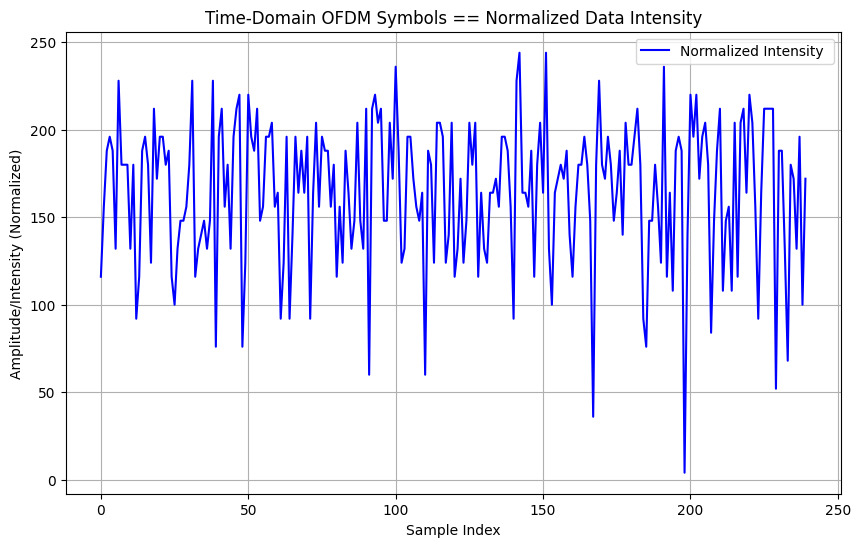

In [10]:
# Buat dictionary untuk mapping
mapping = {
    220: 4,
    221: 12,
    222: 20,
    223: 28,
    224: 36,
    225: 44,
    226: 52,
    227: 60,
    228: 68,
    229: 76,
    230: 84,
    231: 92,
    232: 100,
    233: 108,
    234: 116,
    235: 124,
    236: 132,
    237: 140,
    238: 148,
    239: 156,
    240: 164,
    241: 172,
    242: 180,
    243: 188,
    244: 196,
    245: 204,
    246: 212,
    247: 220,
    248: 228,
    249: 236,
    250: 244
}

# Fungsi untuk melakukan mapping
def map_value(value):
    return mapping.get(value, None)

# Lakukan mapping pada setiap nilai dalam daftar
mapped_values = [map_value(value) for value in normalized_data]

# Cetak hasil mapping
print(f"Values: {mapped_values}")

length_of_data = len(mapped_values)

# Cetak hasilnya
print(f"length_of_data: {length_of_data}")

# Plot the normalized data
plt.figure(figsize=(10, 6))
plt.plot(mapped_values, label='Normalized Intensity ', color='blue')
plt.title('Time-Domain OFDM Symbols == Normalized Data Intensity')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude/Intensity (Normalized)')
plt.grid(True)
plt.legend()
plt.show()



#Code di bawah ini hanyalah contoh normalisasi.
#code berakhir di atas / code dibawah ini tidak di pakai

Data yang sudah dinormalisasi dan dibulatkan: [ 3694.  2348.  3514.  5887.  6772.  6503.  4745.  1733.  6157.  5761.
  2643.  4474.  5541.  5089.  3874.  5145.  2463.  4903.  4310.  4199.
  3694.  6369.  5541.  7549.  4925.   743.  4310.  5141.  6157.  2761.
  5541.  5274.  4310.  2465.  5106.  3291.  3694.  3074.  3514.  2814.
  8004.  6154.  5976.  4819.  3694.  5545.  2643.  8778.  3078.  4227.
  6592.  6407.  6157.  1885.  6741.  7283.  4310.  4032.  5721.  5546.
  3694.  4632.   647.  2928.  4310.  2901.  5976.  4125.  1231.  2639.
  5976.  2646.  6772.  6589.  5106.  6596.  2463.  5109.  5106.  6334.
  3078.  4165.  2823.  4403.  5541.  4832.  4776.  5070.  3078.  3223.
  4565.  6679.  3078.  2556. 10000.  6012.  3078.  4803.  3694.  3898.
  6772.  4004.  4925.  1214.  5541.  8020.  3694.  5231.  4310.  5337.
  4925.  4432.  3694.  5432.  6412.  6141.  4925.  2818.  3439.  7687.
  3694.   215.  4670.  3199.  4925.  6311.  5180.  5136.  5541.  3183.
  5976.  3444.  4925.  4059.  2

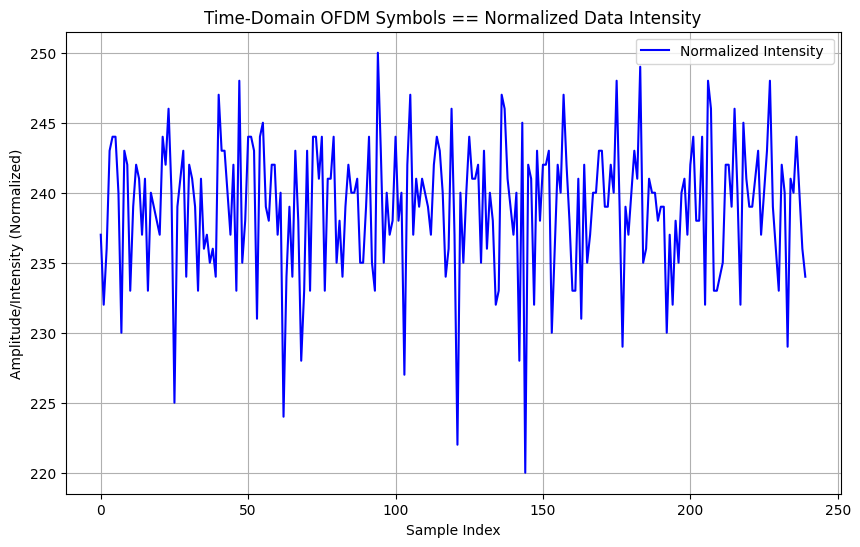

Formatted result data Normalitation (intensitas cahaya): 237, 232, 236, 243, 244, 244, 240, 230, 243, 242, 233, 239, 242, 241, 237, 241, 233, 240, 239, 238, 237, 244, 242, 246, 240, 225, 239, 241, 243, 234, 242, 241, 239, 233, 241, 236, 237, 235, 236, 234, 247, 243, 243, 240, 237, 242, 233, 248, 235, 238, 244, 244, 243, 231, 244, 245, 239, 238, 242, 242, 237, 240, 224, 234, 239, 234, 243, 238, 228, 233, 243, 233, 244, 244, 241, 244, 233, 241, 241, 244, 235, 238, 234, 239, 242, 240, 240, 241, 235, 235, 239, 244, 235, 233, 250, 243, 235, 240, 237, 238, 244, 238, 240, 227, 242, 247, 237, 241, 239, 241, 240, 239, 237, 242, 244, 243, 240, 234, 236, 246, 237, 222, 240, 235, 240, 244, 241, 241, 242, 235, 243, 236, 240, 238, 232, 233, 247, 246, 241, 239, 237, 240, 228, 245, 220, 242, 241, 232, 243, 238, 242, 242, 243, 230, 236, 242, 240, 247, 242, 238, 233, 233, 241, 231, 242, 235, 237, 240, 240, 243, 243, 239, 239, 242, 240, 248, 239, 229, 239, 237, 240, 243, 241, 249, 235, 236, 241, 240, 240

In [11]:
#code lain jika di butuhkan
#normalisasi dan denormalisassi 0-1
import numpy as np

# Data sampel
data = np.array([154.625, 154.07853696, 154.5517767, 155.51556596, 155.875, 155.76556596, 155.0517767, 153.82853696, 155.625, 155.46435626, 154.1982233, 154.94154082, 155.375, 155.19154082, 154.6982233, 155.21435626, 154.125, 155.11606981, 154.875, 154.83010489, 154.625, 155.71109121, 155.375, 156.19049316, 155.125, 153.42682341, 154.875, 155.21278833, 155.625, 154.24601557, 155.375, 155.26661362, 154.875, 154.12604766, 155.1982233, 154.46122039, 154.625, 154.37343207, 154.5517767, 154.26766128, 156.375, 155.62395234, 155.5517767, 155.08167283, 154.625, 155.37656793, 154.1982233, 156.6894455, 154.375, 154.84140486, 155.8017767, 155.72670389, 155.625, 153.89061268, 155.86243687, 156.08247467, 154.875, 154.76214853, 155.4482233, 155.3768495, 154.625, 155.00583393, 153.38756313, 154.31397194, 154.875, 154.30282435, 155.5517767, 154.80020876, 153.625, 154.19665537, 155.5517767, 154.19927096, 155.875, 155.80072904, 155.1982233, 155.80334463, 154.125, 155.19979124, 155.1982233, 155.69717565, 154.375, 154.81634172, 154.27144661, 154.91306023, 155.375, 155.08693977, 155.06433983, 155.18365828, 154.375, 154.43365828, 154.97855339, 155.83693977, 154.375, 154.16306023, 157.18566017, 155.56634172, 154.375, 155.07527191, 154.625, 154.70795534, 155.875, 154.75084856, 155.125, 153.61816513, 155.375, 156.38183487, 154.625, 155.24915144, 154.875, 155.29204466, 155.125, 154.92472809, 154.625, 155.33062517, 155.72855339, 155.6186854, 155.125, 154.26922922, 154.52144661, 156.24653585, 154.625, 153.21226805, 155.02144661, 154.42420782, 155.125, 155.68787756, 155.22855339, 155.21057093, 155.375, 154.41752533, 155.5517767, 154.52329611, 155.125, 154.77329611, 154.0517767, 154.16752533, 156.375, 156.18602806, 155.1982233, 154.8731505, 154.625, 155.1231505, 153.6982233, 155.93602806, 153.125, 155.32720773, 155.22855339, 154.04494182, 155.625, 154.81070689, 155.375, 155.32237475, 155.625, 153.8621321, 154.52144661, 155.35150479, 155.125, 156.49995328, 155.375, 154.78117865, 154.125, 154.12604766, 155.1982233, 153.91632529, 155.375, 154.37343207, 154.6982233, 155.08315444, 155.125, 155.62395234, 155.5517767, 154.91946115, 154.875, 155.37656793, 155.0517767, 156.58105912, 154.875, 153.72840101, 154.9482233, 154.69295636, 155.125, 155.57764169, 155.3017767, 156.92488048, 154.375, 154.46093882, 155.3017767, 154.99638346, 155.125, 154.73301849, 154.9482233, 154.8857797, 153.875, 154.6313146, 154.02144661, 154.8274893, 154.375, 155.03942907, 155.16789322, 154.68997288, 155.375, 155.82579218, 154.72855339, 154.71540392, 155.875, 154.00346415, 156.58210678, 156.2671339, 154.125, 154.19034077, 154.24111652, 154.42235831, 155.375, 155.38629997, 154.9482233, 156.27159899, 155.125, 153.99899906, 156.00888348, 155.26698151, 154.875, 154.9243602, 155.3017767, 155.53906118, 154.625, 155.14113295, 155.5517767, 156.73353876, 154.875, 154.51476412, 154.1982233, 155.45832323, 155.125, 153.75531366, 155.1982233, 155.07712141, 155.875, 155.08878927, 154.5517767, 154.2310166])

# Fungsi untuk normalisasi dengan pembulatan
def normalize_with_rounding(data, scale_factor=10000):
    data_min = np.min(data)
    data_max = np.max(data)
    normalized_data = (data - data_min) / (data_max - data_min)  # Normalisasi
    scaled_data = np.round(normalized_data * scale_factor)  # Pembulatan setelah diskalakan
    return scaled_data, data_min, data_max, scale_factor

# Fungsi untuk de-normalisasi
def denormalize_with_rounding(scaled_data, data_min, data_max, scale_factor=10000):
    normalized_data = scaled_data / scale_factor  # Mengembalikan ke nilai normalisasi
    denormalized_data = normalized_data * (data_max - data_min) + data_min  # De-normalisasi
    return denormalized_data

# Normalisasi data dengan pembulatan
scaled_data, data_min, data_max, scale_factor = normalize_with_rounding(data)
print("Data yang sudah dinormalisasi dan dibulatkan:", scaled_data)

# De-normalisasi data
denormalized_data = denormalize_with_rounding(scaled_data, data_min, data_max, scale_factor)
print("Data yang sudah di de-normalisasi:", denormalized_data)

# Membandingkan hasil de-normalisasi dengan data asli
print("Perbedaan antara data asli dan data de-normalisasi:", np.abs(data - denormalized_data))



# Normalisasi data ke rentang 10 - 250
normalized_data, data_min, data_max = normalize_logarithmic(data, new_min, new_max)

# Konversi ke bilangan bulat agar hasil tidak memiliki titik desimal
normalized_data = normalized_data.astype(int)

print(normalized_data)
# Output hasil yang sudah dinormalisasi
values = ', '.join(map(str, normalized_data)) + ','
# Plot the normalized data
plt.figure(figsize=(10, 6))
plt.plot(normalized_data, label='Normalized Intensity ', color='blue')
plt.title('Time-Domain OFDM Symbols == Normalized Data Intensity')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude/Intensity (Normalized)')
plt.grid(True)
plt.legend()
plt.show()
print("Formatted result data Normalitation (intensitas cahaya):", values)

# Simpan hasil normalisasi, nilai minimum, dan maksimum untuk digunakan di Code 2
print(f"data_min = {data_min}")
print(f"data_max = {data_max}")



[209 193 207 229 236 234 220 184 231 228 197 217 226 223 211 223 195 221
 216 214 209 233 226 241 221 167 216 223 231 199 226 224 216 195 223 205
 209 202 207 199 244 231 230 220 209 226 197 248 203 215 234 233 231 187
 235 239 216 213 228 226 209 219 165 201 216 200 230 214 176 197 230 197
 236 234 223 234 195 223 223 232 203 214 199 216 226 220 220 222 203 204
 218 235 203 196 255 230 203 220 209 211 236 213 221 176 226 244 209 224
 216 225 221 217 209 225 233 231 221 199 207 242 209 155 219 204 221 232
 223 223 226 204 230 207 221 213 192 196 244 241 223 215 209 221 179 237
 150 225 223 192 231 214 226 225 231 186 207 226 221 246 226 213 195 195
 223 188 226 202 211 220 221 231 230 217 216 226 220 247 216 181 217 211
 221 230 225 252 203 205 225 218 221 212 217 216 186 209 191 214 203 219
 222 211 226 235 212 212 236 191 247 242 195 197 199 204 226 227 217 242
 221 191 238 224 216 217 225 230 209 221 230 249 216 206 197 228 221 182
 223 220 236 220 207 198]


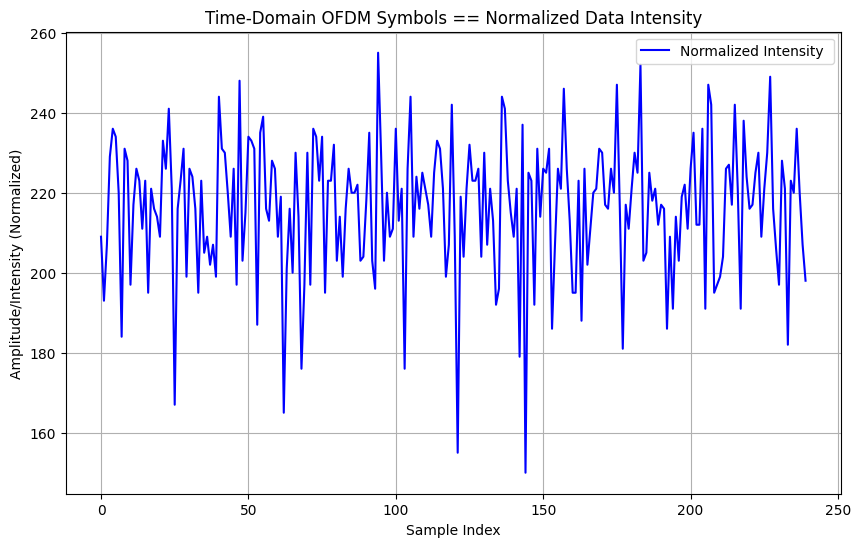

Formatted result data Normalitation (intensitas cahaya): 209, 193, 207, 229, 236, 234, 220, 184, 231, 228, 197, 217, 226, 223, 211, 223, 195, 221, 216, 214, 209, 233, 226, 241, 221, 167, 216, 223, 231, 199, 226, 224, 216, 195, 223, 205, 209, 202, 207, 199, 244, 231, 230, 220, 209, 226, 197, 248, 203, 215, 234, 233, 231, 187, 235, 239, 216, 213, 228, 226, 209, 219, 165, 201, 216, 200, 230, 214, 176, 197, 230, 197, 236, 234, 223, 234, 195, 223, 223, 232, 203, 214, 199, 216, 226, 220, 220, 222, 203, 204, 218, 235, 203, 196, 255, 230, 203, 220, 209, 211, 236, 213, 221, 176, 226, 244, 209, 224, 216, 225, 221, 217, 209, 225, 233, 231, 221, 199, 207, 242, 209, 155, 219, 204, 221, 232, 223, 223, 226, 204, 230, 207, 221, 213, 192, 196, 244, 241, 223, 215, 209, 221, 179, 237, 150, 225, 223, 192, 231, 214, 226, 225, 231, 186, 207, 226, 221, 246, 226, 213, 195, 195, 223, 188, 226, 202, 211, 220, 221, 231, 230, 217, 216, 226, 220, 247, 216, 181, 217, 211, 221, 230, 225, 252, 203, 205, 225, 218, 221

In [12]:
#normalisasi dan denormalisassi 150-255
import numpy as np

# Data sampel
data = np.array([154.625, 154.07853696, 154.5517767, 155.51556596, 155.875, 155.76556596, 155.0517767, 153.82853696, 155.625, 155.46435626, 154.1982233, 154.94154082, 155.375, 155.19154082, 154.6982233, 155.21435626, 154.125, 155.11606981, 154.875, 154.83010489, 154.625, 155.71109121, 155.375, 156.19049316, 155.125, 153.42682341, 154.875, 155.21278833, 155.625, 154.24601557, 155.375, 155.26661362, 154.875, 154.12604766, 155.1982233, 154.46122039, 154.625, 154.37343207, 154.5517767, 154.26766128, 156.375, 155.62395234, 155.5517767, 155.08167283, 154.625, 155.37656793, 154.1982233, 156.6894455, 154.375, 154.84140486, 155.8017767, 155.72670389, 155.625, 153.89061268, 155.86243687, 156.08247467, 154.875, 154.76214853, 155.4482233, 155.3768495, 154.625, 155.00583393, 153.38756313, 154.31397194, 154.875, 154.30282435, 155.5517767, 154.80020876, 153.625, 154.19665537, 155.5517767, 154.19927096, 155.875, 155.80072904, 155.1982233, 155.80334463, 154.125, 155.19979124, 155.1982233, 155.69717565, 154.375, 154.81634172, 154.27144661, 154.91306023, 155.375, 155.08693977, 155.06433983, 155.18365828, 154.375, 154.43365828, 154.97855339, 155.83693977, 154.375, 154.16306023, 157.18566017, 155.56634172, 154.375, 155.07527191, 154.625, 154.70795534, 155.875, 154.75084856, 155.125, 153.61816513, 155.375, 156.38183487, 154.625, 155.24915144, 154.875, 155.29204466, 155.125, 154.92472809, 154.625, 155.33062517, 155.72855339, 155.6186854, 155.125, 154.26922922, 154.52144661, 156.24653585, 154.625, 153.21226805, 155.02144661, 154.42420782, 155.125, 155.68787756, 155.22855339, 155.21057093, 155.375, 154.41752533, 155.5517767, 154.52329611, 155.125, 154.77329611, 154.0517767, 154.16752533, 156.375, 156.18602806, 155.1982233, 154.8731505, 154.625, 155.1231505, 153.6982233, 155.93602806, 153.125, 155.32720773, 155.22855339, 154.04494182, 155.625, 154.81070689, 155.375, 155.32237475, 155.625, 153.8621321, 154.52144661, 155.35150479, 155.125, 156.49995328, 155.375, 154.78117865, 154.125, 154.12604766, 155.1982233, 153.91632529, 155.375, 154.37343207, 154.6982233, 155.08315444, 155.125, 155.62395234, 155.5517767, 154.91946115, 154.875, 155.37656793, 155.0517767, 156.58105912, 154.875, 153.72840101, 154.9482233, 154.69295636, 155.125, 155.57764169, 155.3017767, 156.92488048, 154.375, 154.46093882, 155.3017767, 154.99638346, 155.125, 154.73301849, 154.9482233, 154.8857797, 153.875, 154.6313146, 154.02144661, 154.8274893, 154.375, 155.03942907, 155.16789322, 154.68997288, 155.375, 155.82579218, 154.72855339, 154.71540392, 155.875, 154.00346415, 156.58210678, 156.2671339, 154.125, 154.19034077, 154.24111652, 154.42235831, 155.375, 155.38629997, 154.9482233, 156.27159899, 155.125, 153.99899906, 156.00888348, 155.26698151, 154.875, 154.9243602, 155.3017767, 155.53906118, 154.625, 155.14113295, 155.5517767, 156.73353876, 154.875, 154.51476412, 154.1982233, 155.45832323, 155.125, 153.75531366, 155.1982233, 155.07712141, 155.875, 155.08878927, 154.5517767, 154.2310166])


# Rentang normalisasi yang diinginkan
new_min = 150
new_max = 255

# Fungsi untuk normalisasi ke rentang [new_min, new_max] dengan pembulatan
def normalize_to_range_with_rounding(data, new_min, new_max, scale_factor=10000):
    data_min = 100
    data_max = 300
    normalized_data = (data - data_min) / (data_max - data_min)  # Normalisasi ke [0, 1]
    scaled_data = np.round(normalized_data * (new_max - new_min) + new_min)  # Skala ke [new_min, new_max] dan pembulatan
    return scaled_data, data_min, data_max

# Fungsi untuk de-normalisasi dari rentang [new_min, new_max] ke data asli
def denormalize_from_range_with_rounding(scaled_data, data_min, data_max, new_min, new_max):
    normalized_data = (scaled_data - new_min) / (new_max - new_min)  # Normalisasi kembali ke [0, 1]
    denormalized_data = normalized_data * (data_max - data_min) + data_min  # De-normalisasi ke data asli
    return denormalized_data


# Normalisasi data ke rentang 10 - 250
normalized_data, data_min, data_max = normalize_logarithmic(data, new_min, new_max)

# Konversi ke bilangan bulat agar hasil tidak memiliki titik desimal
normalized_data = normalized_data.astype(int)

print(normalized_data)
# Output hasil yang sudah dinormalisasi
values = ', '.join(map(str, normalized_data)) + ','
# Plot the normalized data
plt.figure(figsize=(10, 6))
plt.plot(normalized_data, label='Normalized Intensity ', color='blue')
plt.title('Time-Domain OFDM Symbols == Normalized Data Intensity')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude/Intensity (Normalized)')
plt.grid(True)
plt.legend()
plt.show()
print("Formatted result data Normalitation (intensitas cahaya):", values)

# Simpan hasil normalisasi, nilai minimum, dan maksimum untuk digunakan di Code 2
print(f"data_min = {data_min}")
print(f"data_max = {data_max}")

In [13]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Existing mapped signal
# tx_signal = tx_signal_combined_real  # Assuming this is defined somewhere

# # Mapping parameters
# min_val = 100
# max_val = 200
# min_signal = np.min(tx_signal)
# max_signal = np.max(tx_signal)

# # Normalize signal within the range [min_val, max_val]
# mapped_real_part = min_val + (tx_signal - min_signal) * (max_val - min_val) / (max_signal - min_signal)

# def insert_sequence_numbers(data, interval, seq_num):
#     """Insert binary sequence number every 'interval' elements in the data."""
#     # Convert seq_num to binary and then to a list of integers
#     seq_num_bin = list(map(int, format(seq_num, '08b')))  # Using 8 bits for the sequence number
#     output = []
#     for i in range(0, len(data), interval):
#         output.extend(data[i:i+interval])  # Add next chunk of data
#         output.extend(seq_num_bin)         # Add sequence number
#     return np.array(output)

# # Insert sequence numbers
# interval = 200  # Insert SN after every 200 elements
# seq_num = 0  # Example starting sequence number
# enhanced_signal = insert_sequence_numbers(mapped_real_part, interval, seq_num)

# def plot_ofdm_signals(signal):
#     """Plot time-domain OFDM signal with sequence numbers."""
#     plt.figure(figsize=(14, 6))
#     plt.plot(signal, label='Mapped Signal with SN')
#     plt.title('Time-Domain OFDM Symbols with Sequence Numbers')
#     plt.xlabel('Sample Index')
#     plt.ylabel('Amplitude')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# # Visualize the enhanced signal
# plot_ofdm_signals(enhanced_signal)


In [14]:
tx_signal = tx_signal_combined_real

# # Map the tx_signal values to the boundary of 150-210
# min_val = 50
# max_val = 200
# min_signal = np.min(tx_signal)
# max_signal = np.max(tx_signal)
mapped_real_part = min_val + (tx_signal - min_signal) * (max_val - min_val) / (max_signal - min_signal)
# print("mapped_real_part", mapped_real_part)

def plot_ofdm_symbols(ofdm_symbols):
    """Plot the real and imaginary parts of all time-domain OFDM symbols in a single graph."""
    combined_real = ofdm_symbols
    

    plt.figure(figsize=(14, 6))

    plt.plot(combined_real, label='Real Part')
    plt.title('Time-Domain OFDM Symbols (Real and Imaginary Parts)')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()
    
# Visualize the time-domain OFDM symbols
plot_ofdm_symbols(tx_signal)

NameError: name 'min_val' is not defined